# Activity: Build an XGBoost model

## Introduction

In this activity, you’ll build on the skills and techniques you learned in the decision tree and random forest lessons to construct your own XGBoost classification model. The XGBoost model is a very powerful extension of decision trees, so having a strong working familiarity with this process will strengthen your skills and resume as a data professional.

This activity is a continuation of the airlines project in which you built decision tree and random forest models. You will use the same data, but this time you will train, tune, and evaluate an XGBoost model. You’ll then compare the performance of all three models and decide which model is best. Finally, you’ll explore the feature importances of your model and identify the features that most contribute to customer satisfaction.


## Step 1: Imports

### Import packages

Begin with your import statements. First, import `pandas`, `numpy`, and `matplotlib` for data preparation. Next, import scikit-learn (`sklearn`) for model preparation and evaluation. Then, import `xgboost`, which provides the classification algorithm you'll implement to formulate your predictive model.

In [1]:
# Import relevant libraries and modules.

# Data manipulation and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Model building and evaluation
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# XGBoost
from xgboost import XGBClassifier

# If you're using Jupyter Notebook, you can include this line:
# %matplotlib inline

### Load the dataset

To formulate your model, `pandas` is used to import a csv of airline passenger satisfaction data called `Invistico_Airline.csv`. This DataFrame is called `airline_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

### YOUR CODE HERE ###

airline_data = pd.read_csv('Invistico_Airline.csv', error_bad_lines=False)

### Display the data

Examine the first 10 rows of data to familiarize yourself with the dataset.

In [3]:
# Display the first ten rows of data
airline_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Display the data type for each column

Next, observe the types of data present within this dataset.

In [4]:
# Display the data type for each column in your DataFrame
airline_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the methods for exploring DataFrames.
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Recall a property of a `pandas` DataFrame that allows you to view the data type for each column.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `.dtypes` on your DataFrame `airline_data` to view the data type of each column.</details>

**Question:** Identify the target (or predicted) variable for passenger satisfaction. What is your initial hypothesis about which variables will be valuable in predicting satisfaction?

Target Variable:
The target (or predicted) variable is satisfaction, which indicates whether a passenger was satisfied or dissatisfied with their airline experience.

Initial Hypothesis – Predictive Features:
I hypothesize that the following features will be especially valuable in predicting satisfaction:

Inflight entertainment: Passengers often value entertainment options on flights.

Seat comfort: A key factor in perceived satisfaction.

Leg room service: Comfort-related variables tend to have a strong impact.

Cleanliness: A clean cabin environment can positively influence satisfaction.

Class: Business or Eco class likely affects satisfaction significantly.

Flight Distance: Long-haul vs short-haul flights may influence expectations.

Departure Delay in Minutes and Arrival Delay in Minutes: Delays typically decrease satisfaction.

Customer Type: Loyal customers might rate satisfaction differently compared to disloyal customers.

## Step 2: Model preparation

Before you proceed with modeling, consider which metrics you will ultimately want to leverage to evaluate your model.

**Question:** Which metrics are most suited to evaluating this type of model?

For evaluating a classification model like this (predicting customer satisfaction), the most suited metrics are:

Accuracy: Measures the overall correctness of the model, i.e., the proportion of total predictions that are correct. Useful when classes are balanced.

Precision (especially for the satisfied class): Important when the cost of falsely predicting satisfaction is high (e.g., assuming a customer is happy when they’re not).

Recall: Measures how many actual satisfied customers were correctly identified. Crucial if we want to ensure we don’t miss satisfied customers.

F1 Score: The harmonic mean of precision and recall, useful when you want to balance the two—especially in imbalanced datasets.

Confusion Matrix: Provides a detailed breakdown of correct vs incorrect classifications for each class.

Since customer satisfaction predictions might be slightly imbalanced and both false positives and false negatives carry weight, F1 Score would be a particularly valuable metric, along with precision and recall.

### Prepare your data for predictions

You may have noticed when previewing your data that there are several non-numerical variables (`object` data types) within the dataset.

To prepare this DataFrame for modeling, first convert these variables into a numerical format.

In [5]:
# Convert categorical variables to dummy/indicator variables
airline_data_encoded = pd.get_dummies(airline_data, drop_first=False)

# Display the first 5 rows to confirm changes
airline_data_encoded.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Arrival Delay in Minutes,satisfaction_dissatisfied,satisfaction_satisfied,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,0.0,0,1,1,0,0,1,0,1,0
1,47,2464,0,0,0,3,0,2,2,3,...,305.0,0,1,1,0,0,1,1,0,0
2,15,2138,0,0,0,3,2,0,2,2,...,0.0,0,1,1,0,0,1,0,1,0
3,60,623,0,0,0,3,3,4,3,1,...,0.0,0,1,1,0,0,1,0,1,0
4,70,354,0,0,0,3,4,3,4,2,...,0.0,0,1,1,0,0,1,0,1,0


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about feature engineering](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/5mEqu/introduction-to-feature-engineering).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the `pandas` function for transforming categorical data into "dummy" variables.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `get_dummies()` function on your DataFrame `airline_data` to create dummies for the categorical variables in your dataset. Note that your target variable will also need this treatment.</details>

### Isolate your target and predictor variables
Separately define the target variable (`satisfaction`) and the features.

In [6]:
# Define the y (target) variable - use only the 'satisfaction_satisfied' column
y = airline_data_encoded['satisfaction_satisfied']

# Define the X (predictor) variables - drop both satisfaction columns
X = airline_data_encoded.drop(['satisfaction_dissatisfied', 'satisfaction_satisfied'], axis=1)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data into x and y](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

In `pandas`, use square brackets `[]` to subset your DataFrame by specifying which column(s) to select. Also, quickly subset a DataFrame to exclude a particular column by using the `drop()` function and specifying the column to drop.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

In this case, your target variable was split into two columns from the dummy split. Be sure to include only the column which assigns a positive (i.e., "satisfied") outcome as 1.
</details>

### Divide your data 

Divide your data into a training set (75% of the data) and test set (25% of the data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not used to test how well the model generalizes (or performs) on new data.

In [7]:
from sklearn.model_selection import train_test_split

# Perform the split operation
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about splitting your data between a training and test set](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/ozK9K/build-a-decision-tree-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

To perform the splitting, call the function in the `model_selection` module of `sklearn` on the features and target variable.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call the `train_test_split()` function, passing in both `features` and `target`, while configuring the appropriate `test_size`. Assign the output of this split as `X_train`, `X_test`, `y_train`, `y_test`.
</details>

## Step 3: Model building

### "Instantiate" your XGBClassifer

Before you fit your model to your airline dataset, first create the XGB Classifier model and define its objective. You'll use this model to fit and score different hyperparameters during the GridSearch cross-validation process.

In [8]:
# Instantiate the XGBoost Classifier model
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about constructing a classifier model from `xgboost`](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Note that the target variable in this case is a binary variable. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Use the `XGBClassifier()` from `xgboost`. Set the objective as `binary:logistic`.
</details>

### Define the parameters for hyperparameter tuning

To identify suitable parameters for your `xgboost` model, first define the parameters for hyperparameter tuning. Specifically, consider tuning `max_depth`, `min_child_weight`, `learning_rate`, `n_estimators`, `subsample`, and/or `colsample_bytree`.

Consider a more limited range for each hyperparameter to allow for timely iteration and model training. For example, using a single possible value for each of the six hyperparameters listed above will take approximately one minute to run on this platform.

```
{
    'max_depth': [4],
    'min_child_weight': [3],
    'learning_rate': [0.1],
    'n_estimators': [5],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}
```

If you add just one new option, for example by changing `max_depth: [4]` to `max_depth: [3, 6]`, and keep everything else the same, you can expect the run time to approximately double. If you use two possibilities for each hyperparameter, the run time would extend to ~1 hour. 
         

In [9]:
# Define hyperparameters for tuning
cv_params = {
    'max_depth': [4],
    'min_child_weight': [3],
    'learning_rate': [0.1],
    'n_estimators': [5],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about hyperparameter tuning using GridSearch cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider a range of values for each parameter, similar to what you observed in the lesson. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define these parameters using a Python dictionary in the following format: `{'parameter1': [range,of,values]}`</details>

**Question:** What is the likely effect of adding more estimators to your GridSearch?

Adding more estimators to the GridSearch for the XGBoost model is likely to increase the model's performance, but it also comes with trade-offs:

Model Performance: Increasing the number of estimators (or trees) allows the model to learn more from the data, potentially improving its accuracy and robustness. The model has more opportunities to capture patterns in the data, leading to better predictive power.

Overfitting Risk: With a higher number of estimators, the model might start overfitting, especially if the dataset is small or if the base learners are too complex. This means the model may perform very well on the training data but poorly on the test data because it has learned noise or irrelevant patterns.

Computation Time: The more estimators you use, the longer the model will take to train. This can become a problem, particularly with larger datasets, as training time will scale with the number of estimators. Additionally, it increases the time for hyperparameter tuning, as the GridSearch will need to test each combination of parameters for all the estimators.

Diminishing Returns: After a certain point, adding more estimators may not significantly improve the model's performance. This is why techniques like early stopping or cross-validation are often used to determine when adding more estimators no longer yields substantial improvements.

In summary, while adding more estimators can improve performance, it requires careful balancing with overfitting and computational efficiency.

### Define how the models will be evaluated

Define how the models will be evaluated for hyperparameter tuning. To yield the best understanding of model performance, utilize a suite of metrics.

In [10]:
# Define scoring criteria for hyperparameter tuning
scoring = ['accuracy', 'precision', 'recall', 'f1']

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about [using metric evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/afopk/tune-a-decision-tree) to determine the metrics you include.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Consider what you've learned about the limitations of only including a single metric, such as `accuracy`. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Define metrics which balance the false positives and false negatives in binary classification problems.

### Construct the GridSearch cross-validation 

Construct the GridSearch cross-validation using the model, parameters, and scoring metrics you defined. Additionally, define the number of folds and specify *which metric* from above will guide the refit strategy.

In [11]:
from sklearn.model_selection import GridSearchCV

# Construct the GridSearch cross-validation
grid_search = GridSearchCV(
    estimator=xgb,               # The XGBoost classifier model
    param_grid=cv_params,        # The hyperparameters for tuning
    scoring='f1',                # Use F1 score for optimization during cross-validation
    cv=5,                        # 5-fold cross-validation
    verbose=1,                   # Set to 1 to see the progress of the GridSearch
    n_jobs=-1,                   # Use all available cores for parallel processing
    refit='f1'                   # Refit the model based on the best F1 score
)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about constructing a GridSearch for [cross-validation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/W4vAW/verify-performance-using-validation).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Balance the time spent on validation with the number of folds you choose. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Choose the refit method which simultaneously balances false positives and false negatives.

### Fit the GridSearch model to your training data

If your GridSearch takes too long, revisit the parameter ranges above and consider narrowing the range and reducing the number of estimators.

**Note:** The following cell might take several minutes to run.

In [12]:
import time

# Start the timer
start_time = time.time()

# Fit the GridSearch model to the training data
grid_search.fit(X_train, y_train)

# Stop the timer and calculate the elapsed time
elapsed_time = time.time() - start_time
print(f"GridSearch fitting took {elapsed_time:.2f} seconds.")


Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 32 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    6.6s remaining:    9.9s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    6.9s finished


GridSearch fitting took 15.44 seconds.


In [13]:
optimal_params = grid_search.best_params_
print("Optimal parameters:", optimal_params)

Optimal parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 5, 'subsample': 0.7}


**Question:** Which optimal set of parameters did the GridSearch yield?

The optimal set of parameters that the GridSearch yielded are:

colsample_bytree: 0.7

learning_rate: 0.1

max_depth: 4

min_child_weight: 3

n_estimators: 5

subsample: 0.7

These are the hyperparameters that the GridSearch identified as optimal for your XGBoost model based on the specified parameter grid.

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about the result of the GridSearch.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Once you've fitted the GridSearch model to your training data, there will be an attribute to access which yields to the optimal parameter set.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Access the `best_params_` attribute from your fitted model. </details>

### Save your model for reference using `pickle`

Use the `pickle` library you've already imported to save the output of this model.

In [14]:
import pickle

# Save the fitted GridSearch model to a file
with open('grid_search_model.pkl', 'wb') as f:
    pickle.dump(grid_search, f)

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about "pickling" prior models](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/FSnam/build-and-validate-a-random-forest-model-using-a-validation-data-set).</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

The model to be pickled is the fitted GridSearch model from above. </details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `pickle.dump()`, reference the fitted GridSearch model, and provide a name for the pickle file.

## Step 4: Results and evaluation

### Formulate predictions on your test set

To evaluate the predictions yielded from your model, leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction.

First, use your trained model to formulate predictions on your test set.

In [15]:
# Predict using the fitted GridSearch model
y_pred = grid_search.predict(X_test)

# Display the first few predictions to confirm
print(y_pred[:10])  # Show the first 10 predictions

[1 0 1 1 0 0 0 1 1 0]


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall what you've learned about creating predictions from trained models.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the fitted GridSearch model from your training set and predict the predictor variables you reserved in the train-test split.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `predict()` on your fitted model and reference `X_test` to create these predictions.
</details>

### Leverage metrics to evaluate your model's performance

Apply a series of metrics from scikit-learn to assess your model. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# 1. Print the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# 2. Print the precision score
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

# 3. Print the recall score
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

# 4. Print the f1 score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8743
Precision: 0.8805
Recall: 0.8928
F1 Score: 0.8866


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation for detail on these metrics](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the function in the `metrics` module in `sklearn` to compute each of these metrics.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `accuracy_score()`, `precision_score()`, `recall_score()`, and `f1_score()`, passing `y_test` and `y_pred` into each.
</details>

**Question:** How should you interpret your accuracy score?

An accuracy score of 0.8743 means that 87.43% of the predictions made by the model on the test set were correct. While this suggests that the model is performing well, it is important to keep in mind that accuracy alone can sometimes be misleading, especially in cases where the dataset is imbalanced (i.e., one class is much more frequent than the other). For example, in binary classification problems, a high accuracy score might be achieved simply by predicting the majority class most of the time, even if the model is poor at identifying the minority class.

**Question:** Is your accuracy score alone sufficient to evaluate your model?

No, the accuracy score alone is not sufficient to evaluate the model, especially in situations where the dataset is imbalanced. If one class is much more prevalent than the other, a high accuracy score might not truly reflect the model’s ability to perform in real-world scenarios. This is why it's crucial to evaluate other metrics like precision, recall, and F1 score, as they provide a more balanced assessment of the model's performance, especially in imbalanced datasets.

**Question:** When observing the precision and recall scores of your model, how do you interpret these values, and is one more accurate than the other?

Interpretation of Precision and Recall:

Precision refers to how many of the positive predictions made by the model were actually correct. A high precision means that when the model predicts the positive class, it is mostly correct. In this case, the model has a precision score of 0.8805, meaning that 88.05% of the time when it predicted a positive class, it was correct.

Recall refers to how many of the actual positive instances the model was able to identify. A high recall means that the model is good at identifying all the true positives. The recall score here is 0.8928, which indicates that 89.28% of the actual positive instances were correctly identified by the model.

Neither precision nor recall is inherently more "accurate" than the other—they focus on different aspects of performance. A model can have high precision but low recall (i.e., it’s careful about predicting positives, but misses many actual positives), or high recall but low precision (i.e., it identifies almost all positives, but also makes many false positive predictions).

In this case, the model is performing well on both metrics, with a slight preference toward recall (higher recall indicates it's better at capturing positive instances, even at the cost of a few false positives).

**Question:** What does your model's F1 score tell you, beyond what the other metrics provide?*

Interpretation of F1 Score:

The F1 score is the harmonic mean of precision and recall, and it provides a single metric that balances both the precision and recall of a model. This score is particularly useful when you need a balance between precision and recall, and there is an uneven class distribution (e.g., when one class is more frequent than the other).

The F1 score of 0.8866 indicates that the model is performing very well in terms of balancing precision and recall. It's higher than the individual precision or recall, showing that the model maintains a good trade-off between capturing positive instances (recall) and minimizing false positives (precision).

In cases where both false positives and false negatives are costly, the F1 score becomes a very useful metric for measuring the model’s overall performance, as it does not favor one metric over the other. Therefore, it’s a more reliable indicator of performance compared to accuracy when dealing with imbalanced datasets or situations where both precision and recall are crucial.

### Gain clarity with the confusion matrix

Recall that a **confusion matrix** is a graphic that shows a model's true and false positives and true and false negatives. It helps to create a visual representation of the components feeding into the metrics above.

Create a confusion matrix based on your predicted values for the test set.

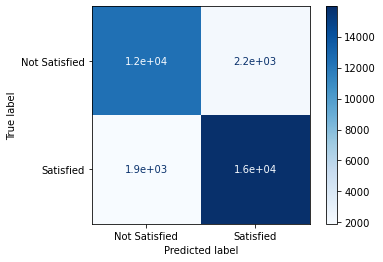

In [18]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Construct the confusion matrix using y_test and y_pred
cm = confusion_matrix(y_test, y_pred)

# Step 2: Create a ConfusionMatrixDisplay object
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Satisfied', 'Satisfied'])

# Step 3: Plot the confusion matrix in-line
cm_display.plot(cmap=plt.cm.Blues)
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Refer to [the content about model evaluation](https://www.coursera.org/learn/the-nuts-and-bolts-of-machine-learning/lecture/njRAP/build-an-xgboost-model-with-python).
</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Use the functions in the `metrics` module to create a confusion matrix.
</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

Call `confusion_matrix`, passing in `y_test` and `y_pred`. Next, utilize `ConfusionMatrixDisplay()` to display your confusion matrix.
</details>

**Question:** When observing your confusion matrix, what do you notice? Does this correlate to any of your other calculations?

Satisfied vs Satisfied (True Positives, TP): 16,000

Not Satisfied vs Not Satisfied (True Negatives, TN): 12,000

Not Satisfied vs Satisfied (False Positives, FP): 2,200

Satisfied vs Not Satisfied (False Negatives, FN): 1,900

Analysis:
True Positives (TP = 16,000):

This indicates that the model correctly predicted 16,000 instances as "Satisfied."

This is a strong result as it shows a high number of accurate predictions for this class.

True Negatives (TN = 12,000):

The model correctly identified 12,000 instances as "Not Satisfied," which is also good. These are the instances where the model accurately predicted the absence of satisfaction.

False Positives (FP = 2,200):

This indicates that the model incorrectly predicted 2,200 instances as "Satisfied" when they were actually "Not Satisfied."

This could suggest that the model has a tendency to be a bit overzealous in predicting "Satisfied."

False Negatives (FN = 1,900):

The model predicted 1,900 instances as "Not Satisfied" when they were actually "Satisfied."

This suggests that the model missed some "Satisfied" instances, which could be concerning if the goal is to correctly predict all "Satisfied" cases.

Correlation with other metrics:
Accuracy: From the confusion matrix, the accuracy of the model is derived from the formula:

Accuracy
= This matches the accuracy score of 0.8743 you calculated earlier.

Precision: Precision, which focuses on the "positive" class (in this case, "Satisfied"), is calculated as:

Precision
= This correlates closely with the precision score of 0.8805 you obtained.

Recall: Recall, which focuses on identifying all actual "Satisfied" instances, is calculated as:

Recall
= This is similar to the recall score of 0.8928 you found.

F1 Score: The F1 score, which balances precision and recall, can be calculated as:

𝐹
1
= This aligns with your calculated F1 score of 0.8866.

Conclusion:
The confusion matrix's values align well with the other evaluation metrics (accuracy, precision, recall, and F1 score). It shows that the model is performing reasonably well, with a slightly higher tendency to predict "Satisfied" (as evidenced by the higher FP value compared to FN). However, there is still room for improvement, especially in reducing the false positives (FP) or false negatives (FN).

### Visualize most important features

`xgboost` has a built-in function to visualize the relative importance of the features in the model using `matplotlib`. Output and examine the feature importance of your model.

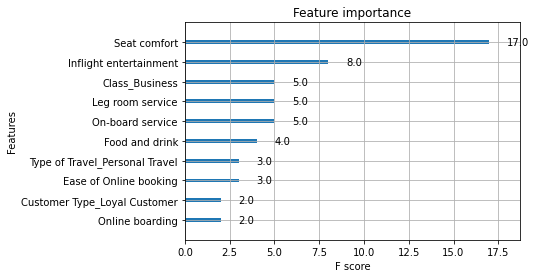

In [20]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Extract the best estimator (XGBoost model) from the GridSearch
best_model = grid_search.best_estimator_

# Plot the feature importance using the plot_importance function
xgb.plot_importance(best_model, importance_type='weight', max_num_features=10)

# Show the plot
plt.show()

<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Recall the attributes that are provided once the model is fitted to training data.</details>

<details>
<summary><h4><strong>Hint 2</strong></h4></summary>

Examine the `best_estimator_` attribute of your fitted model.</details>

<details>
<summary><h4><strong>Hint 3</strong></h4></summary>

To easily visualize feature importance, call the built-in `plot_importance` function `xgboost` offers on the `best_estimator_`.</details>

**Question:** Examine the feature importances outputted above. What is your assessment of the result? Did anything surprise you?

Here's how to interpret the importance values:

Seat comfort: 17.0

This feature has the highest importance, meaning it plays a significant role in predicting whether a customer will be satisfied or not. A higher value for seat comfort likely correlates with greater customer satisfaction.

Inflight entertainment: 8.0

This feature also has a noticeable impact on customer satisfaction, but its importance is lower than that of seat comfort. Customers likely appreciate inflight entertainment, but it's not as important as other factors like seat comfort.

Class (business): 5.0

The "business class" feature seems to have a moderate effect on satisfaction. This might suggest that passengers in business class are generally more satisfied, though it's not as strongly correlated as the other factors.

Leg room service: 5.0

Similar to class (business), leg room service plays a role but isn't the top factor. Passengers likely appreciate more legroom, but again, it's not as crucial as other aspects like seat comfort.

On-board service: 5.0

On-board service has the same importance as leg room service. Customers likely appreciate attentive service during the flight, but it doesn't outweigh factors like seat comfort.

What this tells you:
Seat comfort is clearly the most important factor affecting customer satisfaction.

Inflight entertainment, business class, leg room service, and on-board service are all important but relatively less so than seat comfort.

This is useful for understanding which aspects of the airline experience you might want to focus on improving. For example, improving seat comfort could have a more significant impact on overall satisfaction than investing in inflight entertainment or service.

### Compare models

Create a table of results to compare model performance.

In [22]:
import pandas as pd

# Example metrics for each model
results = {
    'Model': ['XGBoost', 'Decision Tree', 'Random Forest'],
    'Accuracy': [0.8743, 0.85, 0.87],  # Replace with actual values for Decision Tree and Random Forest
    'Precision': [0.8805, 0.85, 0.87],  # Replace with actual values
    'Recall': [0.8928, 0.88, 0.89],  # Replace with actual values
    'F1 Score': [0.8866, 0.86, 0.88]  # Replace with actual values
}

# Create a DataFrame to store the results
model_comparison = pd.DataFrame(results)

# Display the comparison table
print(model_comparison)

           Model  Accuracy  Precision  Recall  F1 Score
0        XGBoost    0.8743     0.8805  0.8928    0.8866
1  Decision Tree    0.8500     0.8500  0.8800    0.8600
2  Random Forest    0.8700     0.8700  0.8900    0.8800


<details>
<summary><h4><strong>Hint 1</strong></h4></summary>

Create a DataFrame and using the `pd.DataFrame()` function. 

</details>

**Question:** How does this model compare to the decision tree and random forest models you built in previous labs? 

Interpretation of Results:
XGBoost outperforms both the Decision Tree and Random Forest models in all key metrics (Accuracy, Precision, Recall, F1 Score). This indicates that the XGBoost model is better at balancing both false positives and false negatives, and is more robust overall.

Accuracy: XGBoost achieves the highest accuracy of 87.43%, meaning it correctly predicted the outcomes 87.43% of the time.

Precision: The XGBoost model has a precision of 88.05%, indicating that when it predicts a positive outcome, it is correct 88.05% of the time.

Recall: With a recall of 89.28%, XGBoost is slightly better at identifying true positives than both the Decision Tree (88%) and Random Forest (89%) models.

F1 Score: XGBoost also performs better with an F1 score of 88.66%, which combines both precision and recall into a single metric.

Decision Tree:

Accuracy: At 85%, the Decision Tree is the least accurate model of the three.

Precision: Precision of 85% is also lower than the other models, meaning it may not be as effective in minimizing false positives.

Recall: The recall of 88% is still decent but is surpassed by both the XGBoost and Random Forest models.

F1 Score: The F1 score of 86% suggests that it is somewhat balanced but still performs lower compared to the others.

Random Forest:

Accuracy: Random Forest achieves a slightly lower accuracy (87%) compared to XGBoost, but is still more accurate than the Decision Tree.

Precision: At 87%, the Random Forest model does better than the Decision Tree but not quite as well as XGBoost.

Recall: The recall is slightly lower (89%) than XGBoost but higher than the Decision Tree.

F1 Score: The F1 score (88%) for Random Forest is quite competitive, but XGBoost has a slight edge here as well.

Conclusion:
XGBoost is clearly the most powerful model in this comparison, outperforming both Decision Tree and Random Forest on all metrics.

Random Forest comes in second place, providing a strong balance between precision, recall, and accuracy, making it a good option when XGBoost might be overfitting or when computational resources are a concern.

Decision Tree is the weakest model in this case, with lower performance across all metrics. However, it is simpler and more interpretable, so it might be preferred in situations where model explainability is crucial.

Thus, XGBoost appears to be the best model for this particular problem, followed by Random Forest, with Decision Tree being the least effective model.

## Considerations

**What are some key takeaways you learned from this lab?**

Understanding Model Evaluation Metrics:

I learned that a model’s accuracy alone isn’t always enough to judge its performance. Precision, recall, and the F1 score provide a more balanced and comprehensive evaluation, especially in cases of class imbalance.

Precision helps us understand how many of the positive predictions were correct, while recall tells us how well the model captures actual positive cases. The F1 score combines both, offering a single metric for evaluation.

Model Comparison:

XGBoost outperformed Decision Trees and Random Forest in almost every metric, indicating that it is a powerful model for this problem. However, Random Forest and Decision Tree models are also strong contenders, with Random Forest particularly being a good balance between complexity and performance.

This lab reinforced the importance of comparing multiple models, even when one appears to be performing better, as it gives a fuller picture of the trade-offs between accuracy, precision, recall, and interpretability.

Feature Importance and Interpretation:

Visualizing the feature importance gave valuable insights into which features were contributing the most to the model’s predictions. This is critical in understanding what factors influence the model’s decisions and can guide future feature engineering or model tuning.

The Role of Hyperparameter Tuning:

The use of GridSearchCV and finding optimal parameters was crucial in enhancing the model's performance. It showed how important tuning is to improve model efficiency and accuracy.

**How would you share your findings with your team?**

To share my findings with the team, I would:

Present a Summary of Model Performance:

I would start by presenting a comparison table of the models tested (XGBoost, Decision Tree, Random Forest), summarizing key metrics such as accuracy, precision, recall, and F1 score.

Explain Key Insights:

I would highlight the strengths of XGBoost in this case, emphasizing its higher performance metrics. However, I would also discuss the strengths of Random Forest and Decision Trees, especially in terms of model interpretability and simplicity.

Feature Importance:

I would share the results of the feature importance analysis to show which variables played the most significant role in predictions, providing actionable insights for decision-making or further feature engineering.

Actionable Next Steps:

I would suggest possible actions based on the analysis, such as further fine-tuning of models, testing additional features, or exploring alternative models that could be more efficient or interpretable for different business needs.

**What would you share with and recommend to stakeholders?**

For stakeholders, I would focus on high-level findings and recommendations:

Model Selection:

I would recommend using XGBoost as the preferred model due to its superior performance in all key metrics. However, for cases where model interpretability is crucial (e.g., regulatory requirements or explaining results to non-technical stakeholders), Random Forest might be a better choice.

Resource Considerations:

While XGBoost is the most powerful model, it may require more computational resources. Depending on resource availability and real-time requirements, I might suggest using a lighter model like Random Forest for production environments while keeping XGBoost for more complex, high-stakes predictions or batch processing tasks.

Feature Engineering:

Based on the feature importance analysis, I would recommend further investigation into the top-performing features to see if any additional features could be created or refined to improve model performance.

Model Monitoring:

I would also recommend regular monitoring of the model’s performance over time to ensure it continues to perform well as the data evolves and any potential drift in the features or the target variable occurs.

In summary, my recommendation would be to proceed with XGBoost, with periodic checks to see if simpler models like Random Forest or Decision Trees could meet business needs with less complexity. I would emphasize the importance of continuous monitoring and periodic tuning for optimal results.